# Scikit-learn

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
from sklearn.datasets import fetch_california_housing, load_iris, load_boston

In [7]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107d2fda0>,
      dtype=object)

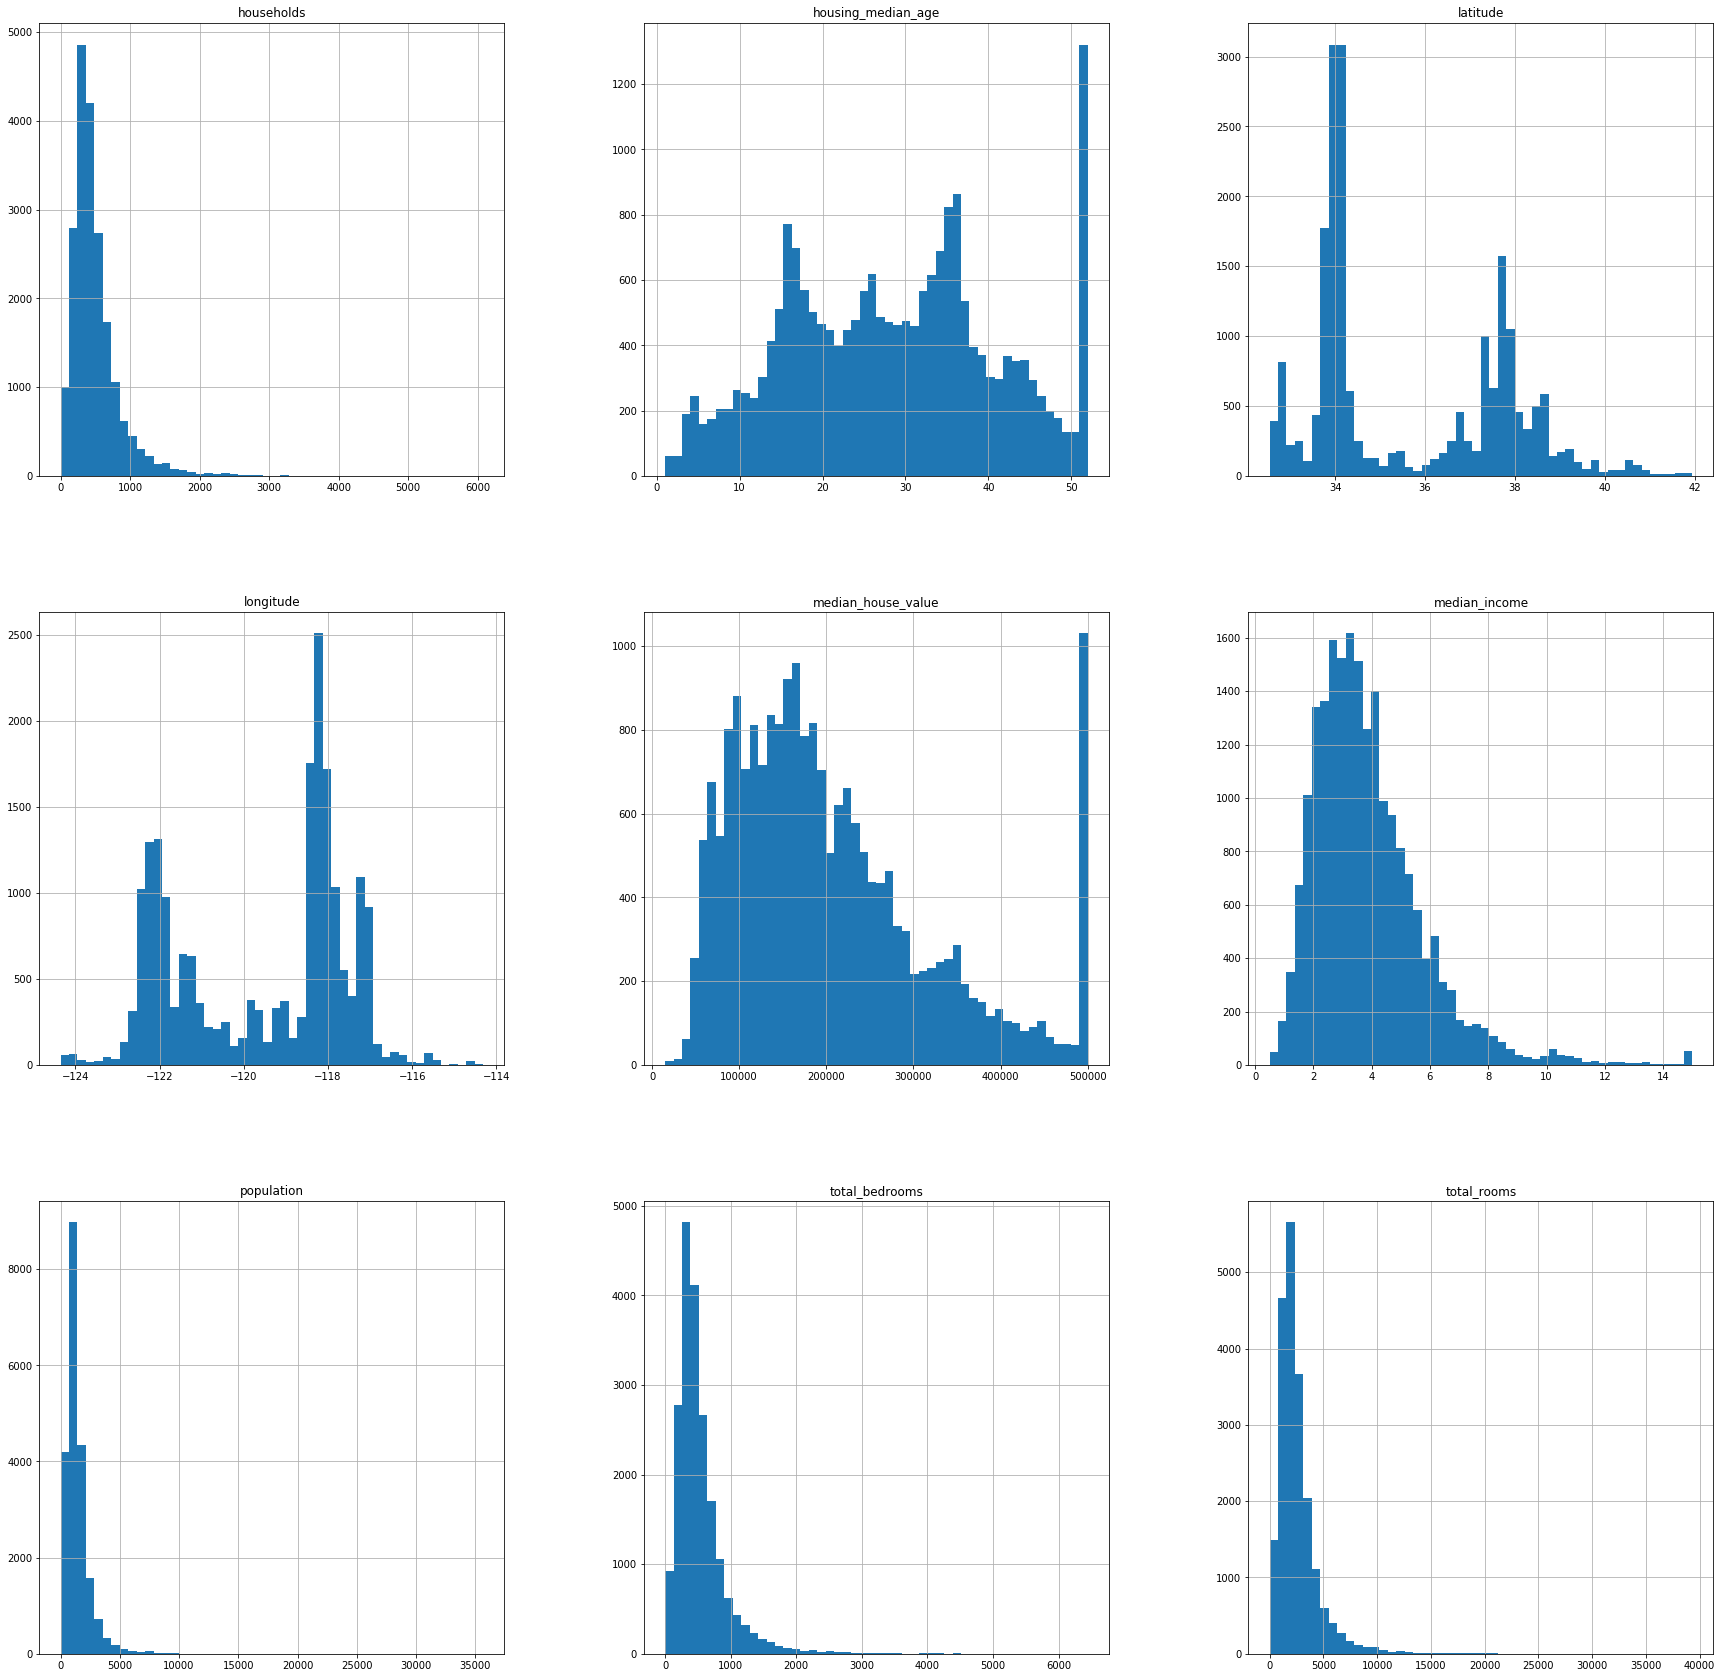

In [13]:
housing.hist(figsize=(30, 30), bins=50)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2)

In [16]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19299,-122.84,38.39,16.0,1688.0,292.0,793.0,280.0,4.4357,216900.0,<1H OCEAN
1597,-122.11,37.89,32.0,2372.0,516.0,1067.0,492.0,4.3235,279500.0,NEAR BAY
11988,-117.51,34.00,36.0,3791.0,746.0,2258.0,672.0,3.2067,124700.0,INLAND
5777,-118.26,34.16,18.0,1775.0,525.0,950.0,522.0,3.5417,177100.0,<1H OCEAN
9456,-123.71,39.88,42.0,1518.0,383.0,656.0,303.0,1.4952,69800.0,NEAR OCEAN


In [17]:
train_set.size

165120

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16751,-122.46,37.71,45.0,1799.0,394.0,1436.0,389.0,3.6500,239900.0,NEAR OCEAN
7779,-118.07,33.91,29.0,2387.0,570.0,1978.0,548.0,3.1957,159200.0,<1H OCEAN
2629,-124.19,40.73,21.0,5694.0,1056.0,2907.0,972.0,3.5363,90100.0,NEAR OCEAN
12802,-121.44,38.61,33.0,1591.0,466.0,1000.0,418.0,1.0467,70100.0,INLAND
4988,-118.31,34.00,52.0,2709.0,642.0,1751.0,613.0,2.1116,122500.0,<1H OCEAN


In [19]:
test_set.size

41280

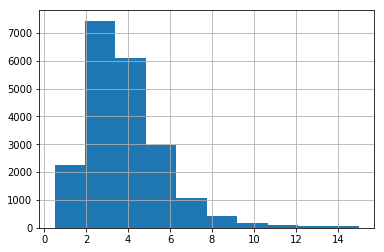

In [22]:
housing['median_income'].hist()

In [23]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

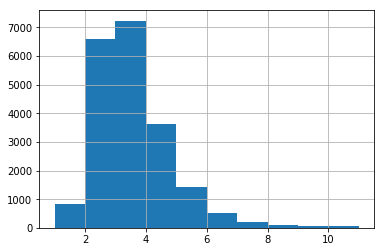

In [25]:
housing['income_cat'].hist()

In [26]:
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [27]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

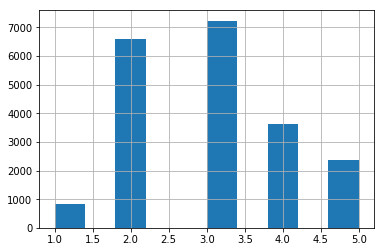

In [29]:
housing['income_cat'].hist()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [33]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

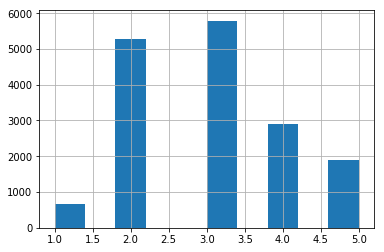

In [34]:
s_train_set['income_cat'].hist()

In [35]:
housing = s_train_set.copy()

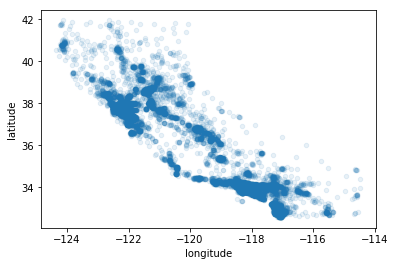

In [37]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

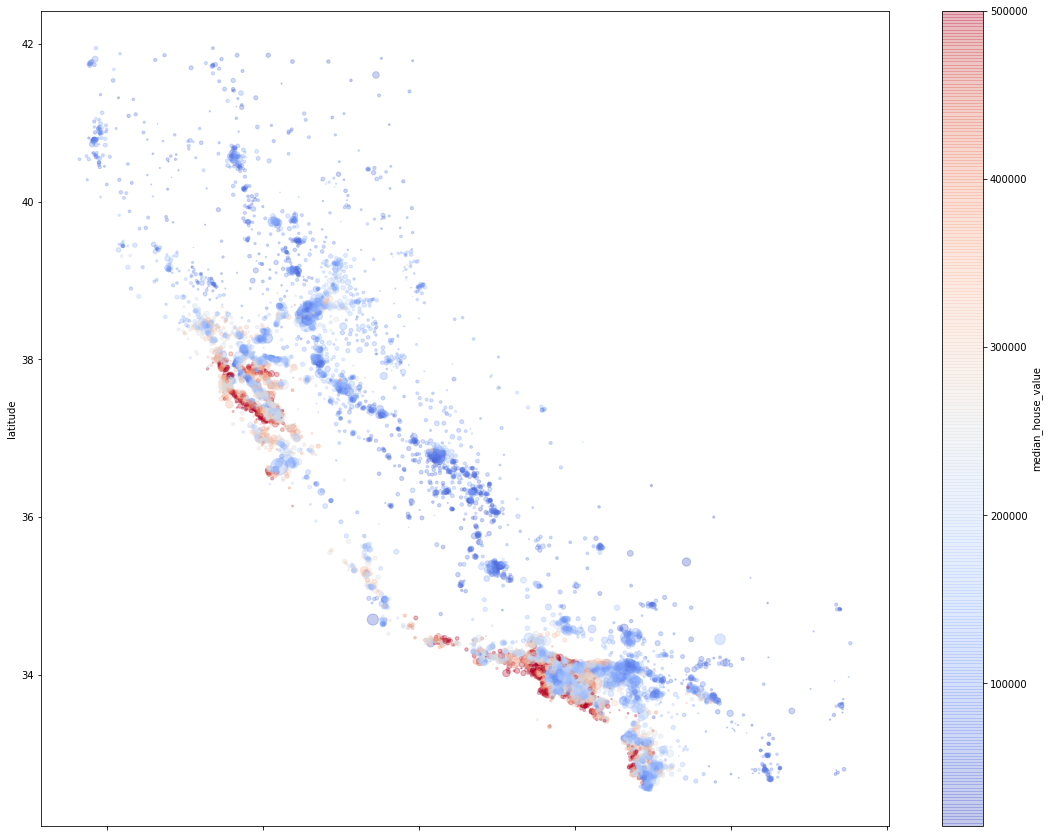

In [45]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, s=housing['population']/100, c='median_house_value', figsize=(19, 15),cmap=plt.get_cmap('coolwarm'), colorbar=True)

In [46]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924918,-0.104655,0.042168,0.068965,0.098388,0.054106,-0.017866,-0.045267,-0.014123
latitude,-0.924918,1.000000,0.007905,-0.034998,-0.067660,-0.108808,-0.070613,-0.077429,-0.144748,-0.082625
housing_median_age,-0.104655,0.007905,1.000000,-0.361149,-0.321741,-0.302607,-0.304200,-0.117078,0.106702,-0.145330
total_rooms,0.042168,-0.034998,-0.361149,1.000000,0.930716,0.867749,0.919403,0.197915,0.132487,0.221028
total_bedrooms,0.068965,-0.067660,-0.321741,0.930716,1.000000,0.887341,0.980189,-0.007181,0.049842,0.017397
population,0.098388,-0.108808,-0.302607,0.867749,0.887341,1.000000,0.916052,0.006582,-0.021956,0.029645
households,0.054106,-0.070613,-0.304200,0.919403,0.980189,0.916052,1.000000,0.014192,0.066488,0.040934
median_income,-0.017866,-0.077429,-0.117078,0.197915,-0.007181,0.006582,0.014192,1.000000,0.686633,0.902991
median_house_value,-0.045267,-0.144748,0.106702,0.132487,0.049842,-0.021956,0.066488,0.686633,1.000000,0.643381
income_cat,-0.014123,-0.082625,-0.145330,0.221028,0.017397,0.029645,0.040934,0.902991,0.643381,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a208ed828>,
      dtype=object)

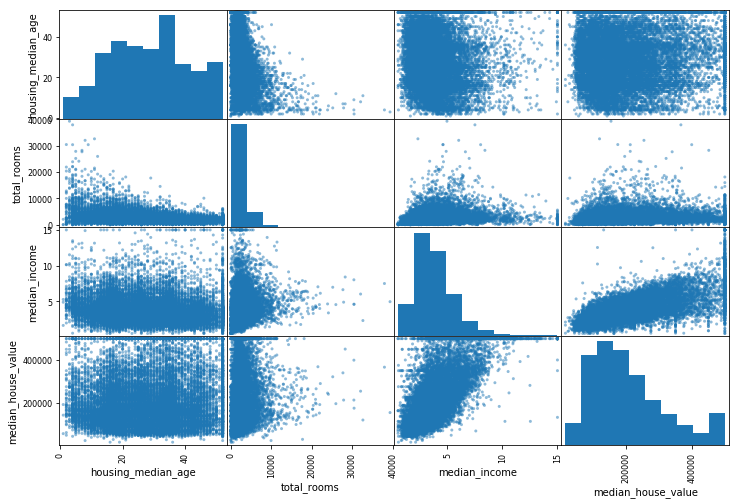

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']], figsize=(12, 8))

In [50]:
housing = s_train_set.copy()

In [51]:
housing.drop('median_house_value', axis=1, inplace=True)

In [52]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12782,-121.44,38.64,18.0,1756.0,442.0,837.0,320.0,1.1250,INLAND,1.0
13844,-117.33,34.53,10.0,3781.0,712.0,2044.0,685.0,3.0943,INLAND,3.0
35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,NEAR BAY,1.0
16979,-122.30,37.56,37.0,1962.0,367.0,1267.0,382.0,4.7344,NEAR OCEAN,4.0
14034,-117.14,32.74,47.0,1494.0,327.0,689.0,304.0,3.1250,NEAR OCEAN,3.0


In [53]:
housing_labels = s_train_set['median_house_value'].copy()

In [55]:
housing_labels.tail()

12782     70500.0
13844     97100.0
35        97200.0
16979    271800.0
14034    172700.0
Name: median_house_value, dtype: float64

In [56]:
housing.tail()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12782,-121.44,38.64,18.0,1756.0,442.0,837.0,320.0,1.1250,INLAND,1.0
13844,-117.33,34.53,10.0,3781.0,712.0,2044.0,685.0,3.0943,INLAND,3.0
35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,NEAR BAY,1.0
16979,-122.30,37.56,37.0,1962.0,367.0,1267.0,382.0,4.7344,NEAR OCEAN,4.0
14034,-117.14,32.74,47.0,1494.0,327.0,689.0,304.0,3.1250,NEAR OCEAN,3.0


In [59]:
incomplete_rows = housing[housing.isnull().any(axis=1)]

In [62]:
incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [64]:
incomplete_rows.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4.0
14307,-117.14,32.71,52.0,500.0,480.0,108.0,1.8696,NEAR OCEAN,2.0
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND,3.0
6541,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN,3.0
14986,-117.03,32.73,34.0,2061.0,1169.0,400.0,3.5096,NEAR OCEAN,3.0
11449,-117.98,33.68,24.0,4177.0,1704.0,606.0,6.2473,<1H OCEAN,5.0
15975,-122.45,37.77,52.0,2602.0,1330.0,647.0,3.5435,NEAR BAY,3.0
4738,-118.38,34.05,49.0,702.0,458.0,187.0,4.8958,<1H OCEAN,4.0
1097,-121.77,39.66,20.0,3759.0,1705.0,600.0,4.7120,INLAND,4.0
8915,-118.46,34.03,52.0,523.0,317.0,130.0,2.2794,<1H OCEAN,2.0


In [66]:
incomplete_rows['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [67]:
incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17923,-121.97,37.35,30.0,1955.0,436.0,999.0,386.0,4.6328,<1H OCEAN,4.0
14307,-117.14,32.71,52.0,500.0,436.0,480.0,108.0,1.8696,NEAR OCEAN,2.0
1350,-121.95,38.03,5.0,5526.0,436.0,3207.0,1012.0,4.0767,INLAND,3.0
6541,-118.05,34.04,33.0,1348.0,436.0,1098.0,257.0,4.2917,<1H OCEAN,3.0
14986,-117.03,32.73,34.0,2061.0,436.0,1169.0,400.0,3.5096,NEAR OCEAN,3.0


In [68]:
from sklearn.preprocessing import Imputer

In [70]:
imputer = Imputer(strategy='median')

In [72]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12782,-121.44,38.64,18.0,1756.0,442.0,837.0,320.0,1.1250,INLAND,1.0
13844,-117.33,34.53,10.0,3781.0,712.0,2044.0,685.0,3.0943,INLAND,3.0
35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,NEAR BAY,1.0
16979,-122.30,37.56,37.0,1962.0,367.0,1267.0,382.0,4.7344,NEAR OCEAN,4.0
14034,-117.14,32.74,47.0,1494.0,327.0,689.0,304.0,3.1250,NEAR OCEAN,3.0


In [73]:
numerical_housing = housing.drop('ocean_proximity', axis=1)

In [74]:
numerical_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12782,-121.44,38.64,18.0,1756.0,442.0,837.0,320.0,1.1250,1.0
13844,-117.33,34.53,10.0,3781.0,712.0,2044.0,685.0,3.0943,3.0
35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,1.0
16979,-122.30,37.56,37.0,1962.0,367.0,1267.0,382.0,4.7344,4.0
14034,-117.14,32.74,47.0,1494.0,327.0,689.0,304.0,3.1250,3.0


In [75]:
imputer.fit(numerical_housing)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [76]:
imputer.statistics_

array([-118.48   ,   34.25   ,   29.     , 2130.5    ,  436.     ,
       1169.     ,  410.     ,    3.53635,    3.     ])

In [78]:
numerical_housing.median().values

array([-118.48   ,   34.25   ,   29.     , 2130.5    ,  436.     ,
       1169.     ,  410.     ,    3.53635,    3.     ])

In [79]:
X = imputer.transform(numerical_housing)

In [81]:
transformed_housing = pd.DataFrame(X, columns=numerical_housing.columns, index = list(housing.index.values))

In [83]:
transformed_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12782,-121.44,38.64,18.0,1756.0,442.0,837.0,320.0,1.1250,1.0
13844,-117.33,34.53,10.0,3781.0,712.0,2044.0,685.0,3.0943,3.0
35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,1.0
16979,-122.30,37.56,37.0,1962.0,367.0,1267.0,382.0,4.7344,4.0
14034,-117.14,32.74,47.0,1494.0,327.0,689.0,304.0,3.1250,3.0


In [84]:
transformed_housing.loc[incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17923,-121.97,37.35,30.0,1955.0,436.0,999.0,386.0,4.6328,4.0
14307,-117.14,32.71,52.0,500.0,436.0,480.0,108.0,1.8696,2.0
1350,-121.95,38.03,5.0,5526.0,436.0,3207.0,1012.0,4.0767,3.0
6541,-118.05,34.04,33.0,1348.0,436.0,1098.0,257.0,4.2917,3.0
14986,-117.03,32.73,34.0,2061.0,436.0,1169.0,400.0,3.5096,3.0
11449,-117.98,33.68,24.0,4177.0,436.0,1704.0,606.0,6.2473,5.0
15975,-122.45,37.77,52.0,2602.0,436.0,1330.0,647.0,3.5435,3.0
4738,-118.38,34.05,49.0,702.0,436.0,458.0,187.0,4.8958,4.0
1097,-121.77,39.66,20.0,3759.0,436.0,1705.0,600.0,4.7120,4.0
8915,-118.46,34.03,52.0,523.0,436.0,317.0,130.0,2.2794,2.0


In [91]:
housing_cat = housing[['ocean_proximity']]

In [92]:
housing_cat.tail()

,ocean_proximity
12782,INLAND
13844,INLAND
35,NEAR BAY
16979,NEAR OCEAN
14034,NEAR OCEAN


In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le = LabelEncoder()

In [96]:
le_encoded_housing_cat = le.fit_transform(housing_cat)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
le_encoded_housing_cat

array([1, 0, 1, ..., 3, 4, 4])

In [98]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)